In [1]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
from PIL import Image # used for loading images
import os # used for navigating to image path
import imageio # used for writing images
import keras
from keras import layers
from keras import models, optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import tensorflow as tf
import cv2
from tqdm import tqdm
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from functools import partial
from itertools import repeat
from multiprocessing import Pool, freeze_support
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Conv2D, MaxPool2D, Flatten, ZeroPadding2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
import os
from os import listdir
from os.path import isfile, join
import multiprocessing as mp
from queue import Empty
import math
from PIL import Image
import glob
cv2.resize(np.zeros((1, 1), np.uint8), (1, 1))
print(tf.__version__)


2.3.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print("GPUs Available: ", len(gpus))

GPUs Available:  1


In [4]:
#Load list of images
def load_image_list(savedir):
  images = []
  images = [f for f in listdir(savedir) if isfile(join(savedir, f))]
  print('Number of images in dir: ' + str(len(images)))
  return images 

In [5]:
savedir = "/content/drive/My Drive/CNN/training_data/"

In [6]:
# Read all labels from User's filenames
def read_labels(list_images):
  X = [] 
  id_student = []
  code_module =[]
  code_presentation = []
  num_of_prev_attempts = []
  result = []
  # frame = []
  full_label = []
  extension= []
  for image in tqdm(list_images):
    id_student.append(image.split('_')[0])
    code_module.append(image.split('_')[1])
    code_presentation.append(image.split('_')[2])
    num_of_prev_attempts.append(image.split('_')[3])
    result.append(image.split('_')[6].split('.')[0])
    full_label.append(image)
  return  result 


In [7]:
# id_student, code_module, code_presentation, num_of_prev_attempts, result, full_label = read_labels(images)

In [8]:
def read_and_process_images(list_images, savedir):
  X = [] 
  id_student = []
  code_module =[]
  code_presentation = []
  num_of_prev_attempts = []
  result = []
  # frame = []
  full_label = []
  extension= []
  for image in tqdm(list_images):
    try:
      X.append(img_resize(image, savedir))
    except:
      print('Cant load file' + str(image))
      continue
    # id_student.append(image.split('_')[0])
    # code_module.append(image.split('_')[1])
    # code_presentation.append(image.split('_')[2])
    # num_of_prev_attempts.append(image.split('_')[3])
    result.append(image.split('_')[6].split('.')[0])
    # full_label.append(image)
  return X, result


In [9]:
# def load_images(savedir,result):
#   X=[]
#   for filename in range(5):
#     im=Image.open(savedir+result[filename])
#     X.append(im)
#   return X

In [10]:
# #Load and resize image
# def img_resize(image, savedir):
#   image =cv2.resize(cv2.imread((savedir + image), cv2.IMREAD_GRAYSCALE), (400, 100), interpolation=cv2.INTER_CUBIC)
#   return image


In [11]:
# length = len(images)


In [12]:
# length

In [13]:
# train_lab = int(length*0.8)

In [14]:
# train_labels = images[:train_lab]

In [15]:
# test_labels = images[train_lab:]

In [16]:
# imagelist = load_images(savedir,train_labels)
# imagelist

In [17]:
# normal = read_and_process_images(imagelist,savedir)

In [18]:
# xtrain, ytrain = read_and_process_images(train_labels,savedir)

In [19]:
# train_dir ="/content/drive/My Drive/Practicum/9010/training/"
# test_dir = "/content/drive/My Drive/Practicum/9010/test/"


In [20]:
# def get_files(directory):
#   if not os.path.exists(directory):
#     return 0
#   count=0
#   for current_path,dirs,files in os.walk(directory):
#     print(current_path)
#     count+= len(glob.glob(os.path.join(current_path+"*")))
#   return count

In [21]:
# train_samples =get_files(train_dir)
# # num_classes=len(glob.glob(train_dir+"/*"))
# test_samples=get_files(test_dir)
# # print(num_classes,"Classes")
# print(train_samples,"Train images")
# print(test_samples,"Test images")

In [22]:
# train_label= load_image_list(train_dir)

In [23]:
# test_label= load_image_list(test_dir)

In [24]:
# xtrain,ytrain = read_and_process_images(train_label,train_dir)

In [25]:
# xtest,ytest = read_and_process_images(test_label,test_dir)

In [26]:
# dummyxtrain = np.array(xtrain)
# dummyxtest = np.array(xtest)
# Y_train = np.array(ytrain)
# Y_test = np.array(ytest)

In [27]:
# from tempfile import TemporaryFile
# xtrainoutfile = TemporaryFile()
# xtestoutfile = TemporaryFile()
# ytrainout = TemporaryFile()
# ytestout = TemporaryFile()

In [28]:
# from google.colab import drive
# drive.mount('/content/drive')

In [29]:
# np.save('xtrain90',dummyxtrain)
# np.save('xtest10',dummyxtest)
# np.save('ytrain90',Y_train)
# np.save('ytest10',Y_test)

In [30]:
Y_test = np.load('/content/drive/My Drive/Practicum/9010/ytest10.npy')

In [31]:
Y_train = np.load('/content/drive/My Drive/Practicum/9010/ytrain90.npy')

In [32]:
X_train = np.load('/content/drive/My Drive/Practicum/9010/xtrain90.npy')

In [33]:
X_test = np.load('/content/drive/My Drive/Practicum/9010/xtest10.npy')

In [34]:
X_train.shape,Y_train.shape, Y_test.shape, X_test.shape

((26305, 100, 400), (26305,), (2922,), (2922, 100, 400))

In [35]:
# X_test = dummyxtest/255

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 26305
number of test examples = 2922
X_train shape: (26305, 100, 400)
Y_train shape: (26305,)
X_test shape: (2922, 100, 400)
Y_test shape: (2922,)


In [36]:
#@title Image configurations L x W x Chan
nrows = 400 #Length of image
ncolumns = 100 # Height of image
channels = 1 # Gray = 1, Colour = 3
batch_size = 32
BATCH_NORM = True


In [37]:
def setup_var(X_train, y_train, y_test, X_test, Xval, Yval):
  # X_train = X_train/255
  # X_test = X_test/255
  # y_train = y_train/255
  # y_test = y_test/255

  classes = list(set(y_train))
  classes_test = list(set(y_test))
  classesval = list(set(Yval))
  print('Number of y classes:\n ' + str(classes))
  y_bi_train = label_binarize(y_train, classes)
  y_bi_test = label_binarize(y_test, classes_test)
  y_bi_val = label_binarize(Yval, classesval)

  X_train = X_train.reshape(len(X_train),ncolumns,nrows,1)
  X_train = X_train.astype('float32')
  X_test = X_test.reshape(len(X_test),ncolumns,nrows,1)
  X_test = X_test.astype('float32')
  Xval = Xval.reshape(len(Xval),ncolumns,nrows,1)
  Xval = Xval.astype('float32')
  #y_train = y_bi_train
  #y_test = y_bi_test
  return X_train, X_test, y_train, y_test, y_bi_train, y_bi_test, Xval, Yval, y_bi_val

In [38]:
Xtrain, Xval, Ytrain, Yval = train_test_split(X_train,Y_train, test_size=0.15)


In [39]:
#  Xtrain.shape, Ytrain.shape, Xval.shape, Yval.shape, y_bi_train.shape, y_bi_test.shape,Xval.shape, Yval.shape

In [40]:
X_train, X_test, y_train, y_test, y_bi_train, y_bi_test,Xval,Yval,y_bi_val = setup_var(Xtrain, Ytrain, Y_test, X_test, Xval, Yval)

Number of y classes:
 ['2', '1', '3', '0']


In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_bi_train.shape, y_bi_test.shape,Xval.shape,Yval.shape,y_bi_val.shape

((22359, 100, 400, 1),
 (2922, 100, 400, 1),
 (22359,),
 (2922,),
 (22359, 4),
 (2922, 4),
 (3946, 100, 400, 1),
 (3946,),
 (3946, 4))

In [42]:
from keras.layers import Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
keras.layers.normalization.BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)
from sklearn.utils import class_weight



In [43]:
# class_weight = class_weight.compute_class_weight('balanced'
#                                                ,np.unique(y_train)
#                                                ,y_train)

In [44]:
# CNN building.
def build_model(nrows, ncolumns, channels, y_test, y_bi_test):
  from keras.layers import LeakyReLU
  model = Sequential()
  model.add(Conv2D(filters = 16, kernel_size = (3,3),input_shape=(100,400,1),padding='valid',use_bias = True))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(3,3)))

  model.add(Conv2D(filters = 32,kernel_size = (3,3),padding='valid'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(3,3)))
  # model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 32,kernel_size = (3,3),padding='valid'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  
  model.add(MaxPooling2D(pool_size=(3,3)))
  # model.add(BatchNormalization())
  model.add(Flatten())

  model.add(Dense(512,activation = 'relu'))
  # model.add(Dropout(0.5))
  model.add(Dense(256,activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4,activation = 'softmax'))
  model.summary()
  model.compile(
        optimizer='adam',
        loss=['sparse_categorical_crossentropy'],
        metrics=['accuracy']
  )
  return model

In [45]:
def train_model(X_train, Xval, y_train, Yval, batch_size, nrows, ncolumns, channels, y_bi_train,y_bi_val):
  ntrain = len(X_train)
  nval = len(Xval)
  print(nval)

  model = build_model(nrows, ncolumns, channels, y_test, y_bi_test)
  train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)
  val_datagen = ImageDataGenerator(rescale=1./255)
  train_generator = train_datagen.flow(X_train, y_train.astype('float32'), batch_size=batch_size)
  val_generator = val_datagen.flow(Xval, Yval.astype('float32'), batch_size= batch_size)

  # https://towardsdatascience.com/image-detection-from-scratch-in-keras-f314872006c9
  history = model.fit(train_generator, 
                                steps_per_epoch = ntrain//batch_size,
                                epochs = 50, validation_data = val_generator,
                                validation_steps = nval//batch_size)
  return history,model,train_generator,val_generator

3946
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 398, 16)       160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 98, 398, 16)       64        
_________________________________________________________________
activation (Activation)      (None, 98, 398, 16)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 132, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 130, 32)       4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 130, 32)       128       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 130, 32)   

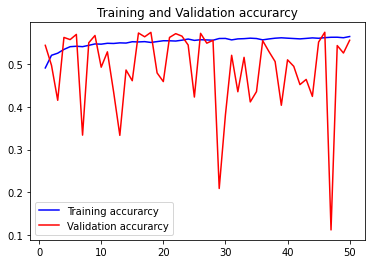

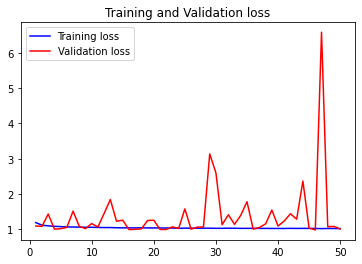

In [46]:
history,model,train_generator,val_generator = train_model(X_train, Xval, y_train, Yval, batch_size, nrows, ncolumns, channels,y_bi_train,y_bi_val)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [48]:
testing_datagen = ImageDataGenerator(rescale= 1./255)
testing_generator = testing_datagen.flow(X_test,y_bi_test,batch_size = batch_size)


In [89]:
result = model.predict(testing_generator, steps=len(testing_generator))

In [90]:
result

array([[0.59287095, 0.02432719, 0.00236403, 0.38043788],
       [0.5556589 , 0.18539101, 0.14295848, 0.11599159],
       [0.09396737, 0.4036912 , 0.49320036, 0.00914104],
       ...,
       [0.57658696, 0.16957454, 0.12257146, 0.13126703],
       [0.6084725 , 0.02613845, 0.00360297, 0.36178595],
       [0.6530664 , 0.12708686, 0.04655312, 0.17329358]], dtype=float32)

In [58]:
# Ynew1= model.predict(X_test_last)

In [64]:
for i in range(len(X_test)):
	print("X=%s, Predicted=%s" % (X_test[i], result[i])) 
  

Streaming output truncated to the last 5000 lines.
  [255.]]], Predicted=[0.67966646 0.10076192 0.02137666 0.1981949 ]
X=[[[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 ...

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]], Predicted=[0.39978683 0.28149858 0.25703794 0.06167663]
X=[[[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 ...

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]], Predicted=[0.62264615 0.13255797 0.07677044 0.1680254 ]
X=[[[25

In [93]:
def acc(y_test, result):
     return np.equal(np.argmax(y_test, axis=-1), np.argmax(result, axis=-1)).mean()

In [94]:
probas = np.array(result)
labels = np.argmax(probas,axis= -1)
print(labels)
labels = np.array(labels)
print(labels)

[0 0 2 ... 0 0 0]
[0 0 2 ... 0 0 0]


In [86]:
classes1 = 4

In [95]:
# from sklearn import preprocessing

# lb = preprocessing.LabelBinarizer()
classes1 = list(set(labels))

new_labels = label_binarize(labels,classes1)
print(new_labels)

[[1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 ...
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [92]:
print("accuracy: " + str(acc(y_bi_test, new_labels)))

accuracy: 0.2265571526351814


In [75]:
validation_datagen = ImageDataGenerator(rescale= 1./255)
validation_generator = validation_datagen.flow(Xval,y_bi_val,batch_size = batch_size)


In [103]:
result1 = np.round(model.predict_generator(validation_generator, steps=len(validation_generator)),0)

In [107]:
final = result1.astype(int)
final

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0]])

In [105]:
y_bi_test

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0]])

In [101]:
# probas1 = np.array(result1)
# labels1 = np.argmax(probas1,axis= -1)
# print(labels1)
# labels1 = np.array(labels1)
# print(labels1)

[0 2 0 ... 0 0 2]
[0 2 0 ... 0 0 2]


In [80]:
# lb = preprocessing.LabelBinarizer()
# new_labels1 = lb.fit_transform(labels1)
# print(new_labels1)

[[0 0 1 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [96]:
# new_labels.dtype

dtype('int64')

In [108]:
print("accuracy: " + str(acc(y_bi_val, final)))

accuracy: 0.22782564622402432


In [109]:
from sklearn.metrics import accuracy_score

In [111]:
score = accuracy_score(y_bi_val,final)

In [ ]:
score1 = acc

In [112]:
score

0.17232640648758235

In [ ]:
print("traning accuracy: {}, testing accuracy: {}".format(metrics.accuracy_score(Y_train, Y_pred_train),metrics.accuracy_score(Y_test, Y_pred)))
print(metrics.classification_report(Y_train, Y_pred_train))
print(metrics.classification_report(Y_test, Y_pred))
print("confusion matrix: \n", metrics.confusion_matrix(Y_test, Y_pred))